## Practice
1. Input simple textures from image files.
2. Use cv2.getPerspectiveTransform() to get Homography Matrix by specifing 4 pairs of corresponding points.
3. Use cv2.warpPerspective() to get projective views of the textures.
4. Use cv2.add() to combine the projective textures to make a 3D room.
5. Optional: Use cv2.threshold(), cv2.bitwise_and() to perform mask operations for complicate 3D room.
6. Upload your Jupyter code file (*.ipynb)
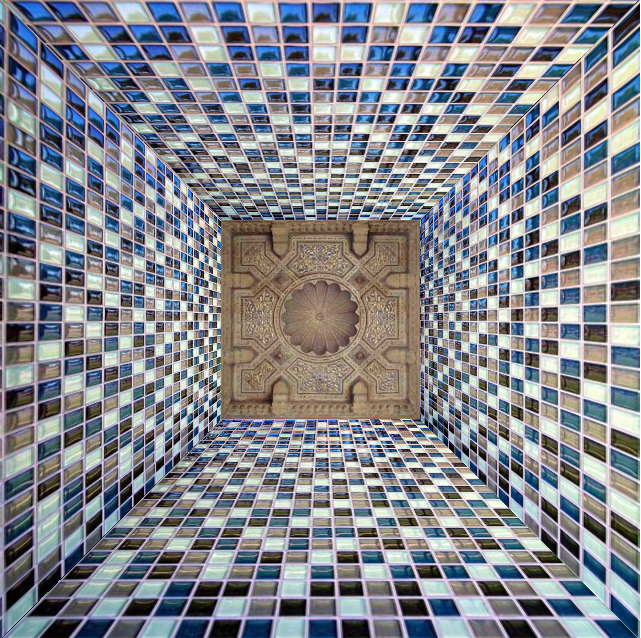


In [1]:
import cv2
import numpy as np

import cv2
import numpy as np
img = cv2.imread('tile_texture_4.jpg')
imgs = cv2.imread('sakura.jpg')
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points = np.float32([[0,0], [cols-1,0], [int(0.333*cols),100], [int(0.666*cols),100]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))


rotation_matrix1 = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
img_rotation1 = cv2.warpAffine(img_output, rotation_matrix1, (cols, rows))
#cv2.imshow('Rotation', img_rotation1)

rotation_matrix2 = cv2.getRotationMatrix2D((cols/2, rows/2), 180, 1)
img_rotation2 = cv2.warpAffine(img_output, rotation_matrix2, (cols, rows))
#cv2.imshow('Rotation2', img_rotation2)

rotation_matrix3 = cv2.getRotationMatrix2D((cols/2, rows/2), 270, 1)
img_rotation3 = cv2.warpAffine(img_output, rotation_matrix3, (cols, rows))
#cv2.imshow('Rotation3', img_rotation3)


#print(imgs.shape[:2])
imgsk = cv2.resize(imgs, (300,300))
src_points2 = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points2 = np.float32([[100,100], [200,100], [100,200], [200,200]])
projective_matrix2 = cv2.getPerspectiveTransform(src_points2, dst_points2)
imgsk = cv2.warpPerspective(imgsk, projective_matrix2, (cols,rows))
#cv2.imshow('sakura', imgsk)


final  = cv2.add(img_rotation1,img_output,img_rotation1)
final  = cv2.add(final,img_rotation2)
final  = cv2.add(final,img_rotation3)
final  = cv2.add(final,imgsk)
cv2.imshow('final', final)

cv2.waitKey()
cv2.destroyAllWindows()



AttributeError: 'NoneType' object has no attribute 'shape'

### 執行結果如下
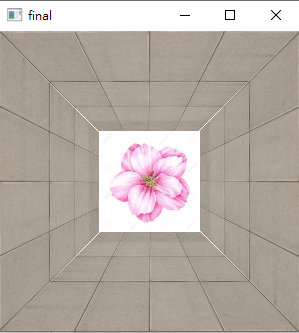